In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

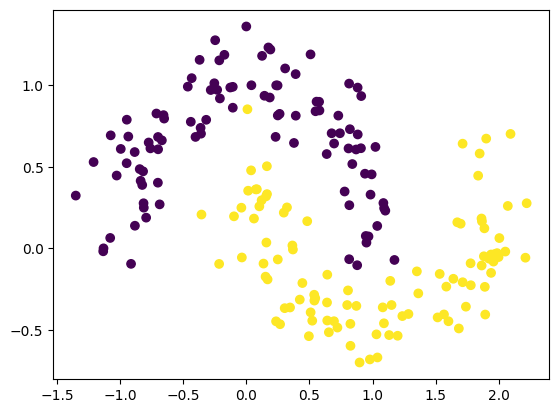

In [2]:
X, t = make_moons(n_samples=200, noise=0.15, random_state=42)

plt.scatter(X[:,0], X[:,1], c=t)

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=5)

In [4]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X, t, cv=5, scoring='accuracy')

print('Exactitud = {:.2f} +/- {:.2f}'.format(scores.mean(), scores.std()))

Exactitud = 0.91 +/- 0.04


In [5]:
from sklearn.model_selection import GridSearchCV

gs_dt = GridSearchCV(dt, param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                     'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                                     'min_impurity_decrease': [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]},
                     cv=5, scoring='accuracy', n_jobs=-1)

In [6]:
gs_dt.fit(X, t)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, min_samples_leaf=3,
                                              min_samples_split=5),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_impurity_decrease': [0, 0.01, 0.05, 0.1, 0.2, 0.3,
                                                   0.5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

In [7]:
print('Los mejores parámetros son', gs_dt.best_params_)
print('El mejor score es {:.2f}'.format(gs_dt.best_score_))

Los mejores parámetros son {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_leaf': 4}
El mejor score es 0.97


In [8]:
# Función adaptada de A. Gèron
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, t, axes=[0, 7.5, 0, 3], is_iris=True,
                           legend=False, plot_training=True, ngridpoints=200,
                           alpha=1.0, ax=None):

    # Prepara los arreglos para colorear
    x1s = np.linspace(axes[0], axes[1], ngridpoints)
    x2s = np.linspace(axes[2], axes[3], ngridpoints)

    # los convierte en una grilla
    x1, x2 = np.meshgrid(x1s, x2s)

    # Calcula las predicciones sobre la grilla
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    if ax is None:
        ax = plt.figure().add_subplot(111)

    # Grafica con colores esa grilla
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    if not is_iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        sct = ax.scatter(X[:,0], X[:, 1], c=t, edgecolors='k', s=9**2,
                  cmap=plt.cm.rainbow, alpha=alpha)
    if is_iris:
        legend1 = ax.legend(sct.legend_elements()[0], iris.target_names,
                            loc="upper left", title="Clases")
        ax.add_artist(legend1)

        ax.set_xlabel("Largo del pétalo", fontsize=16)
        ax.set_ylabel("Ancho del pétalo", fontsize=16)
    else:
        ax.set_xlabel(r"$x_1$", fontsize=18)
        ax.set_ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        ax.legend(loc="lower right", fontsize=14)

<Figure size 1200x800 with 0 Axes>

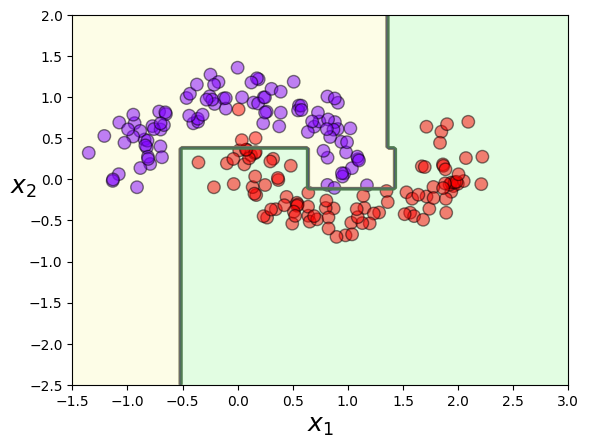

In [9]:
plt.figure(figsize=(12, 8))
plot_decision_boundary(gs_dt, X, t, 
                       alpha=0.5, is_iris=False,
                       axes=[-1.5, 3, -2.5, 2.0])

plt.show()

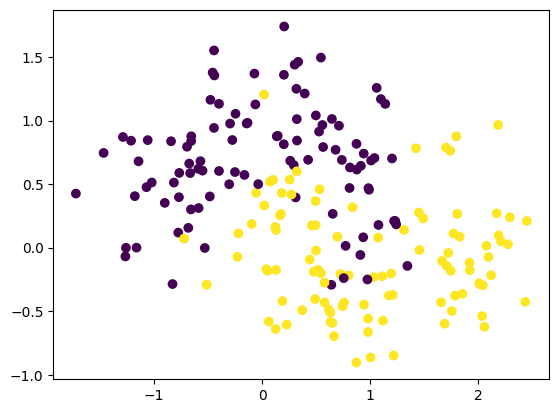

In [10]:
# Generar los datos nuevos, con más ruido y datos
X, t = make_moons(n_samples=200, noise=0.3, random_state=42)
plt.scatter(X[:,0], X[:,1], c=t)

In [11]:
# Instanciar DT
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=5)

# Ajuste de los hiperparámetros 
gs_dt = GridSearchCV(dt, param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                     'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                                     'min_impurity_decrease': [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]},
                     cv=5, scoring='accuracy', n_jobs=-1)

gs_dt.fit(X, t)

# 
print('Los mejores parámetros son', gs_dt.best_params_)
print('El mejor score es {:.2f}'.format(gs_dt.best_score_))

Los mejores parámetros son {'max_depth': 7, 'min_impurity_decrease': 0, 'min_samples_leaf': 1}
El mejor score es 0.87


<Figure size 1200x800 with 0 Axes>

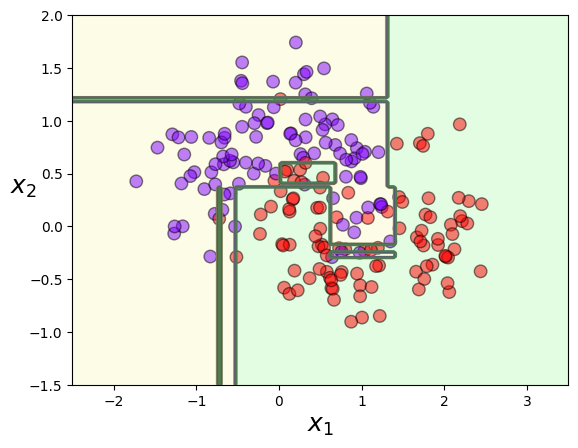

In [12]:
plt.figure(figsize=(12, 8))
plot_decision_boundary(gs_dt, X, t, 
                       alpha=0.5, is_iris=False,
                       axes=[-2.5, 3.5, -1.5, 2.0])

plt.show()

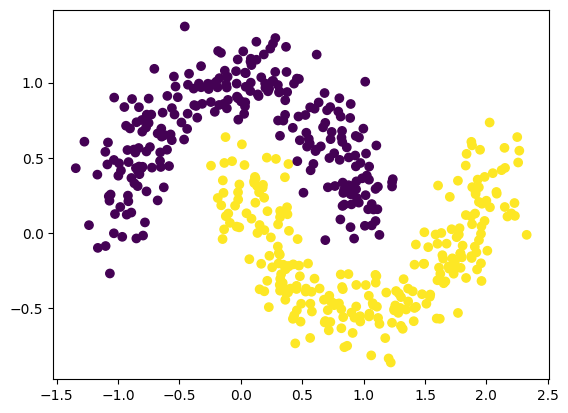

In [13]:
# Generar los datos nuevos, con más ruido y datos
X, t = make_moons(n_samples=500, noise=0.15, random_state=42)
plt.scatter(X[:,0], X[:,1], c=t)


In [14]:
# Instanciar DT
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=5)

# Ajuste de los hiperparámetros 
gs_dt = GridSearchCV(dt, param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                     'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                                     'min_impurity_decrease': [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]},
                     cv=5, scoring='accuracy', n_jobs=-1)

gs_dt.fit(X, t)

# 
print('Los mejores parámetros son', gs_dt.best_params_)
print('El mejor score es {:.2f}'.format(gs_dt.best_score_))

Los mejores parámetros son {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_leaf': 2}
El mejor score es 0.99


<Figure size 1200x800 with 0 Axes>

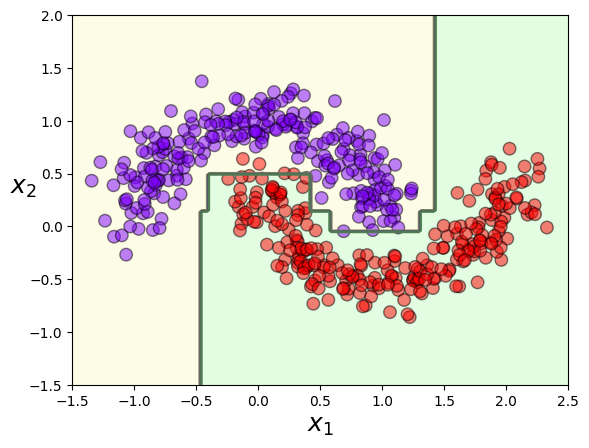

In [15]:
plt.figure(figsize=(12, 8))
plot_decision_boundary(gs_dt, X, t, 
                       alpha=0.5, is_iris=False,
                       axes=[-1.5, 2.5, -1.5, 2.0])

plt.show()